The firm has selected a random sample of 50 sales people and has evaluated each on 3
measures of performance: growth of sales, profitability of sales, and new-account sales.
These measures have been converted to a scale, on which 100 indicates "average" per-
formance. Each of the 50 individuals took each of 4 tests, which purported to measure
creativity, mechanical reasoning, abstract reasoning, and mathematical ability, respec-
tively. The $n=50$ observations on $p=7$ variables are listed in Table 9.12 on page 536.

(a) Assume an orthogonal factor model for the standardized variables $Z_{i}=$
\begin{equation}
\frac{(X_{i}-\mu_{i})}{\sqrt{\sigma_{ii}}}, \quad i=1,2,...,7.
\end{equation}
Obtain either the principal component solution or the maximum likelihood solution for $m=2$ and $m=3$ common factors.

(b) Given your solution in (a), obtain the rotated loadings for $m=2$ and $m=3$ Compare the two sets of rotated loadings. Interpret the $m=2$ and $m=3$ factor solutions.

(c) List the estimated communalities, specific variances, and $\hat{LL}^{\prime}+\hat{\Psi}$ for the $m=2$
and $m=3$ solutions. Compare the results. Which choice of m do you prefer at this
point? Why?

(d) Conduct a test of $H_{0}:\Sigma=LL^{\prime}+\Psi$ versus $H_{1}:\Sigma\ne LL^{\prime}+\Psi$ for both $m=2$ and
$m=3$ at the $\alpha=.01$ level. With these results and those in Parts b and c, which
choice of m appears to be the best?

(e) Suppose a new salesperson, selected at random, obtains the test scores $x^{\prime}=
[110,98,105,15,18,12,35]$ Calculate the salesperson's factor score using the weighted least squares method and the regression method.

Note: The components of x must be standardized using the sample means and vari-
ances calculated from the original data.



In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the working directory
PROJ_ROOT = os.path.join( os.pardir )
sys.path.append( PROJ_ROOT )
# Load the dataset
data_path = os.path.join(PROJ_ROOT,'data','raw', 'T9-12.txt')

In [2]:
from src.features.build_features import explore_data
data = pd.read_csv(data_path, delimiter=' ', header=None, skipinitialspace=True)

explore_data(data)

Shape: (50, 7)
Head:        0      1      2   3   4   5   6
0   93.0   96.0   97.8   9  12   9  20
1   88.8   91.8   96.8   7  10  10  15
2   95.0  100.3   99.0   8  12   9  26
3  101.3  103.8  106.8  13  14  12  29
4  102.0  107.8  103.0  10  15  12  32
Tail:         0      1      2   3   4   5   6
45  103.5  112.0  110.8  18  13  12  37
46   89.5   96.0   97.3   7  15  11  14
47   84.3   89.8   94.3   8   8   8   9
48  104.3  109.5  106.5  14  12  12  36
49  106.0  118.5  105.0  12  16  11  39
Description:                 0           1           2          3         4          5  \
count   50.000000   50.000000   50.000000  50.000000  50.00000  50.000000   
mean    98.836000  106.622000  102.810000  11.220000  14.18000  10.560000   
std      7.337345   10.124315    4.712218   3.950149   3.38478   2.139617   
min     81.500000   87.300000   94.300000   1.000000   5.00000   5.000000   
25%     93.550000   99.500000   99.075000   8.250000  12.00000   9.000000   
50%    100.650000  106.2

No missing values first 3 means are similar 
next 3 means also similar, last columns seems singular with a long range
box plot confirms this




<Axes: >

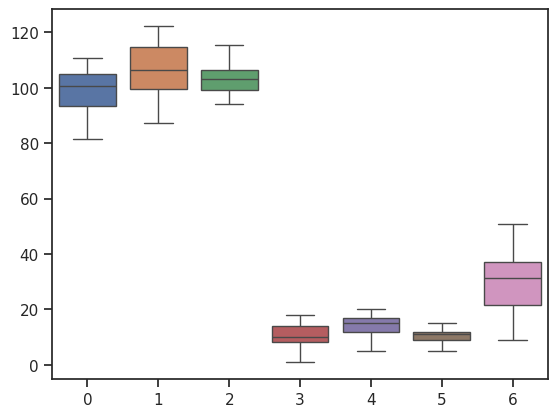

In [3]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.boxplot(data)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

# Assuming your data is in a pandas DataFrame named 'X'
# Standardize the data (equivalent to R's scale function)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


# Perform factor analysis with 3 factors and no rotation (equivalent to "none")
fa_none = FactorAnalysis(n_components=3, rotation=None)
fa_none.fit(data_scaled)

# Perform factor analysis with 3 factors and varimax rotation (equivalent to "varimax")
fa_varimax = FactorAnalysis(n_components=3, rotation="varimax")
fa_varimax.fit(data_scaled)

# Perform factor analysis with 2 factors and varimax rotation
fa_2_varimax = FactorAnalysis(n_components=2, rotation="varimax")
fa_2_varimax.fit(data_scaled)

# Access components (loadings) and uniquenesses (specific variances)
fa_none_components = fa_none.components_
fa_varimax_components = fa_varimax.components_
fa_2_varimax_components = fa_2_varimax.components_

fa_none_uniquenesses = fa_none.get_covariance()
fa_varimax_uniquenesses = fa_varimax.get_covariance()
fa_2_varimax_uniquenesses = fa_2_varimax.get_covariance()

# Print the results (similar to R's output)
print("Factor analysis with no rotation (3 factors):")
print("Components (loadings):")
print(fa_none_components)
print("\nUniquenesses (specific variances):")
print(fa_none_uniquenesses)

print("\n\nFactor analysis with varimax rotation (3 factors):")
print("Components (loadings):")
print(fa_varimax_components)
print("\nUniquenesses (specific variances):")
print(fa_varimax_uniquenesses)

print("\n\nFactor analysis with varimax rotation (2 factors):")
print("Components (loadings):")
print(fa_2_varimax_components)
print("\nUniquenesses (specific variances):")
print(fa_2_varimax_uniquenesses)


Factor analysis with no rotation (3 factors):
Components (loadings):
[[-0.90323579 -0.83007435 -0.93979717 -0.83547359 -0.72831793 -0.5950636
  -0.7819783 ]
 [-0.28008669 -0.15248163 -0.14125364  0.52358826  0.00973212 -0.74513475
  -0.32420358]
 [-0.25914968 -0.50454045 -0.0895707   0.14223004 -0.15769421  0.28154817
  -0.49461848]]

Uniquenesses (specific variances):
[[1.00000035 0.92321243 0.91163393 0.57112068 0.69598339 0.67322195
  0.92529612]
 [0.92321243 0.99995972 0.84683215 0.5419068  0.68263718 0.46551395
  0.94809025]
 [0.91163393 0.84683215 1.0000211  0.69847733 0.69722122 0.63927361
  0.82499926]
 [0.57112068 0.5419068  0.69847733 1.00010209 0.59115717 0.14706073
  0.41322343]
 [0.69598339 0.68263718 0.69722122 0.59115717 0.99993384 0.38174524
  0.64437211]
 [0.67322195 0.46551395 0.63927361 0.14706073 0.38174524 1.00016473
  0.56764325]
 [0.92529612 0.94809025 0.82499926 0.41322343 0.64437211 0.56764325
  1.00003837]]


Factor analysis with varimax rotation (3 factors):


Text(0.5, 1.0, 'Factor loadings (no rotation)')

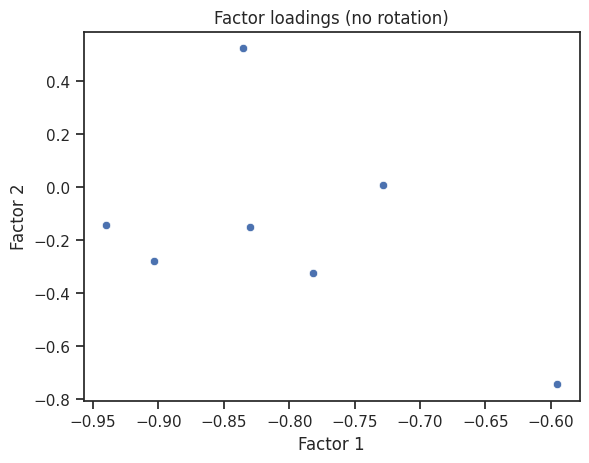

In [8]:
# plot factor loadings

sns.scatterplot(x=fa_none_components[0], y=fa_none_components[1])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor loadings (no rotation)')

Text(0.5, 1.0, 'Factor loadings (varimax rotation)')

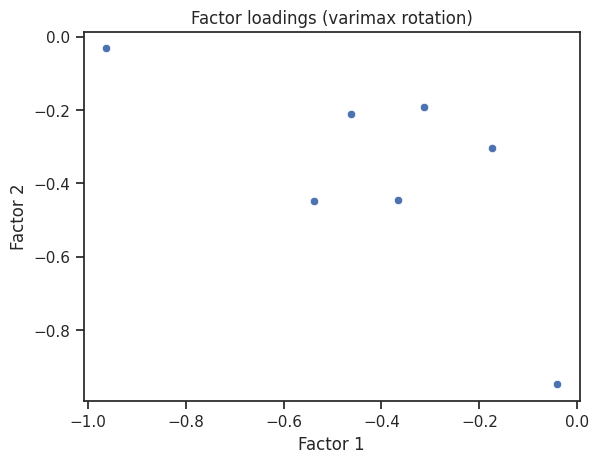

In [6]:

sns.scatterplot(x=fa_varimax_components[0], y=fa_varimax_components[1])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor loadings (varimax rotation)')

Text(0.5, 1.0, 'Factor loadings (varimax rotation, 2 factors)')

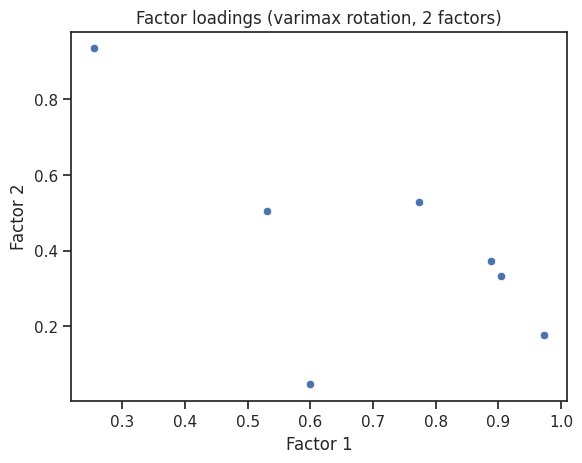

In [7]:
sns.scatterplot(x=fa_2_varimax_components[0], y=fa_2_varimax_components[1])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor loadings (varimax rotation, 2 factors)')